# Tasca 5: Exploració de las dades

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.
Fes un informe complet del data set:

    - Resumeix estadísticament les columnes d’interès
    - Troba quantes dades faltants hi ha per columna
    - Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
    - Taula de les aerolínies amb més endarreriments acumulats
    - Quins són els vols més llargs? I els més endarrerits?
    Etc.
Exporta el data set net i amb les noves columnes a Excel.

http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

## Importación y exploración de los datos

In [2]:
df = pd.read_csv('DelayedFlights.csv')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1936758, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [6]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
df.isna().sum()#*100/len(df)

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [8]:
df.UniqueCarrier.unique()
# Es el código de las aerolineas

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [9]:
df.FlightNum.unique()


array([ 335, 3231,  448, ..., 6869, 6870, 5272])

In [10]:
df[df['FlightNum'] == 3231]
#El mismo número de vuelo puede tener diferentes trayectos, por lo que no aporta mucha información relevante.

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
11633,32985,2008,1,13,7,2109.0,2100,2203.0,2200,WN,3231,N490WN,54.0,60.0,40.0,3.0,9.0,LAS,SAN,258,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
12924,39633,2008,1,15,2,2158.0,2100,2259.0,2200,WN,3231,N420WN,61.0,60.0,44.0,59.0,58.0,LAS,SAN,258,3.0,14.0,0,N,0,49.0,0.0,1.0,0.0,9.0
14435,46491,2008,1,17,4,2155.0,2100,2300.0,2200,WN,3231,N799SW,65.0,60.0,41.0,60.0,55.0,LAS,SAN,258,3.0,21.0,0,N,0,15.0,0.0,5.0,0.0,40.0
15984,49921,2008,1,18,5,2146.0,2100,2244.0,2200,WN,3231,N408WN,58.0,60.0,43.0,44.0,46.0,LAS,SAN,258,5.0,10.0,0,N,0,3.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755485,6523544,2008,12,21,7,959.0,950,1132.0,1110,WN,3231,N251WN,93.0,80.0,76.0,22.0,9.0,LAX,SFO,337,4.0,13.0,0,N,0,0.0,9.0,13.0,0.0,0.0
1768491,6544683,2008,12,28,7,1037.0,950,1141.0,1110,WN,3231,N926WN,64.0,80.0,56.0,31.0,47.0,LAX,SFO,337,4.0,4.0,0,N,0,31.0,0.0,0.0,0.0,0.0
1769874,6547829,2008,12,29,1,958.0,950,1110.0,1110,WN,3231,N252WN,72.0,80.0,59.0,0.0,8.0,LAX,SFO,337,5.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1771335,6551209,2008,12,30,2,1021.0,950,1134.0,1110,WN,3231,N258WN,73.0,80.0,62.0,24.0,31.0,LAX,SFO,337,5.0,6.0,0,N,0,0.0,0.0,24.0,0.0,0.0


<AxesSubplot:>

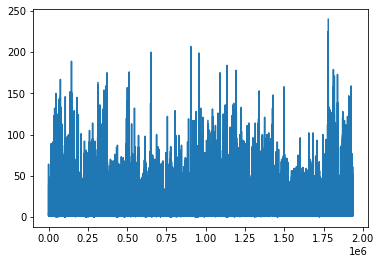

In [11]:
df.TaxiIn.plot()

## Preprocesamiento
### Selección de las columnas que se utilizarán
A partir de los datos de 'df' creo un nuevo DataFrame descartando algunas de las columnas, que considero que no aportan información relevante para el análisis que se llevará a cabo.

Las columnas eliminadas serán: Unnamed, Year, DepTime, ArrTime, FlightNum, TailNum, TaxiIN, TaxiOut

Para las columnas que sí se utilizarán, se seleccionan nombres.

In [42]:
datos = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
datos.columns = ['Month', 'Day_Month', 'Day_Week', 'Schedule_Dep_T', 'Schedule_Arr_T', 'Carrier_Code', 'Actual_Elapsed_T', 'Schedule_Elapsed_T', 'Air_T', 'Arr_Delay',
       'Dep_Delay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'Cancel_Code', 'Diverted', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']
datos

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Carrier_Code,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Origin,Dest,Distance,Cancelled,Cancel_Code,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,1,3,4,1955,2225,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,735,1000,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,620,750,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1755,1925,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1915,2110,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1220,1552,DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,600,749,DL,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,847,1010,DL,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,1240,1437,DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,N,0,NaN,NaN,NaN,NaN,NaN


- Resumen estadístico de las columnas de interés:

In [43]:
datos.describe()

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Distance,Cancelled,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,1.467473e+03,1.634225e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,3.482546e+00,8.776272e+00,1.995966e+00,4.247668e+02,4.646347e+02,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### Análisis e imputación de los valores que faltan

- Porcentage de valores que faltan por columna:

In [44]:
datos.isnull().sum()*100/len(datos)

Month                   0.000000
Day_Month               0.000000
Day_Week                0.000000
Schedule_Dep_T          0.000000
Schedule_Arr_T          0.000000
Carrier_Code            0.000000
Actual_Elapsed_T        0.433043
Schedule_Elapsed_T      0.010223
Air_T                   0.433043
Arr_Delay               0.433043
Dep_Delay               0.000000
Origin                  0.000000
Dest                    0.000000
Distance                0.000000
Cancelled               0.000000
Cancel_Code             0.000000
Diverted                0.000000
Carrier_Delay          35.588855
Weather_Delay          35.588855
NAS_Delay              35.588855
Security_Delay         35.588855
Late_Aircraft_Delay    35.588855
dtype: float64

In [45]:
#datos[datos['Arr_Delay'].isnull()]
datos[datos['Cancelled']==1].isnull().sum()
#datos[datos['Cancelled']==1].describe()

Month                    0
Day_Month                0
Day_Week                 0
Schedule_Dep_T           0
Schedule_Arr_T           0
Carrier_Code             0
Actual_Elapsed_T       633
Schedule_Elapsed_T       0
Air_T                  633
Arr_Delay              633
Dep_Delay                0
Origin                   0
Dest                     0
Distance                 0
Cancelled                0
Cancel_Code              0
Diverted                 0
Carrier_Delay          633
Weather_Delay          633
NAS_Delay              633
Security_Delay         633
Late_Aircraft_Delay    633
dtype: int64

Observamos que, en el caso de vuelos cancelados (633) no tenemos valores de las columnas que implican retraso o hora de llegada. Esto es normal, ya que el vuelo no se ha producido.

In [46]:
#datos[datos['Arr_Delay'].isnull()]
datos[datos['Diverted']==1].isnull().sum()
#datos[datos['Diverted]==1].describe()

Month                     0
Day_Month                 0
Day_Week                  0
Schedule_Dep_T            0
Schedule_Arr_T            0
Carrier_Code              0
Actual_Elapsed_T       7754
Schedule_Elapsed_T      198
Air_T                  7754
Arr_Delay              7754
Dep_Delay                 0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Cancel_Code               0
Diverted                  0
Carrier_Delay          7754
Weather_Delay          7754
NAS_Delay              7754
Security_Delay         7754
Late_Aircraft_Delay    7754
dtype: int64

Podemos ver que lo mismo pasa con los vuelos desviados, ya que tampoco llegan a su destino final. De hecho, si sumamos los vuelos cancelados y desviados 633 + 7754 = 8387. Tenemos la explicación de todos los valores que faltan en las columnas *Actual_Elapsed_T* , *Air_T*, y *Arr_Delay*. Comprobemos que obtenemos si elimináramos estos vuelos:

In [47]:
prueba1 = datos
prueba1.dropna(subset=['Arr_Delay']).isnull().sum()
#prueba1.isnull().sum()

Month                       0
Day_Month                   0
Day_Week                    0
Schedule_Dep_T              0
Schedule_Arr_T              0
Carrier_Code                0
Actual_Elapsed_T            0
Schedule_Elapsed_T          0
Air_T                       0
Arr_Delay                   0
Dep_Delay                   0
Origin                      0
Dest                        0
Distance                    0
Cancelled                   0
Cancel_Code                 0
Diverted                    0
Carrier_Delay          680883
Weather_Delay          680883
NAS_Delay              680883
Security_Delay         680883
Late_Aircraft_Delay    680883
dtype: int64

In [48]:
prueba1.dropna(subset=['Arr_Delay']).describe()

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Distance,Cancelled,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1928371.0,1928371.0,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,6.107855e+00,1.575206e+01,3.984999e+00,1.467718e+03,1.634196e+03,1.333059e+02,1.341977e+02,1.082771e+02,4.219988e+01,4.309169e+01,7.649486e+02,0.0,0.0,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,3.480753e+00,8.776566e+00,1.996050e+00,4.247281e+02,4.646284e+02,7.206007e+01,7.123339e+01,6.864261e+01,5.678472e+01,5.326600e+01,5.738858e+02,0.0,0.0,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.359000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Vemos que ya no hay vuelos cancelados ni desviados. Por lo tanto, los vuelos que no tenían hora de llegada es por que no han llegado al destino previsto. 

La opción de eliminar estos datos (y las columnas relativas a desvío y cancelaciones) es buena si nos interesa únicamente la información sobre retrasos. 

Si queremos mantener la información sobre cancelaciones o desvios, debemos imputar los valores NA. Estos valores son menos del 1%, por lo que no será necesario hacer un estudio muy preciso para realizar la imputación.

Todavía falta averiguar el resto de datos que faltan, los relativos a las últimas columnas que hacen referencia a las causas de los retrasos. Ya vimos que estos datos son NA cuando los vuelos fueron cancelados o desviados... pero esto explica un porcentage muy pequeño de los valores que faltan. 
¿Cómo se explica que falte esta información en un 36% de los casos?

In [49]:
null_delay = datos[datos['Carrier_Delay'].isnull()]

In [50]:
null_delay.describe()

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Distance,Cancelled,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
count,689270.000000,689270.000000,689270.000000,689270.000000,689270.000000,680883.000000,689072.000000,680883.000000,680883.000000,689270.000000,689270.000000,689270.000000,689270.000000,0.0,0.0,0.0,0.0,0.0
mean,6.193837,15.804219,3.993415,1430.413050,1601.225151,129.509591,138.898804,109.847049,3.557162,13.336510,809.303817,0.000918,0.011250,NaN,NaN,NaN,NaN,NaN
std,3.432725,8.745672,2.000811,428.706877,468.031473,71.469591,74.285241,69.464735,7.836561,11.955066,598.408438,0.030291,0.105466,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,0.000000,0.000000,15.000000,-25.000000,0.000000,-109.000000,6.000000,30.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.000000,8.000000,2.000000,1110.000000,1300.000000,76.000000,84.000000,58.000000,-1.000000,8.000000,363.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,6.000000,16.000000,4.000000,1440.000000,1639.000000,112.000000,120.000000,92.000000,5.000000,11.000000,641.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,9.000000,23.000000,6.000000,1755.000000,1955.000000,160.000000,170.000000,139.000000,10.000000,16.000000,1050.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,12.000000,31.000000,7.000000,2359.000000,2400.000000,664.000000,660.000000,631.000000,14.000000,1154.000000,4962.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN


Cuando no hay datos de los motivos de los retrasos, es porque el retraso es de un máximo de 14min.

Viendo esto, podemos considerar que no hay retraso si 'Arr_Delay' es <= 14

Por tanto, para los casos en que los desgloses de retraso por causas son NaN, podemos considerar que no hubo retraso, y hacer una Imputación con 0.

In [51]:
datos.fillna({'Carrier_Delay' : 0, 
                      'Weather_Delay' : 0, 
                      'NAS_Delay' : 0, 
                      'Security_Delay' : 0, 
                      'Late_Aircraft_Delay' : 0
                      }, inplace = True)

In [52]:
datos.isnull().sum()

Month                     0
Day_Month                 0
Day_Week                  0
Schedule_Dep_T            0
Schedule_Arr_T            0
Carrier_Code              0
Actual_Elapsed_T       8387
Schedule_Elapsed_T      198
Air_T                  8387
Arr_Delay              8387
Dep_Delay                 0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Cancel_Code               0
Diverted                  0
Carrier_Delay             0
Weather_Delay             0
NAS_Delay                 0
Security_Delay            0
Late_Aircraft_Delay       0
dtype: int64

In [53]:
datos.fillna({'Actual_Elapsed_T': datos['Actual_Elapsed_T'].mean(),
               'Schedule_Elapsed_T': datos['Schedule_Elapsed_T'].mean(),
               'Air_T': datos['Air_T'].mean(), 
               'Arr_Delay': datos['Arr_Delay'].mean()
              }, inplace = True)


In [54]:
datos.describe()

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Distance,Cancelled,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,1.467473e+03,1.634225e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,3.268348e-04,4.003598e-03,1.235367e+01,2.385512e+00,9.675607e+00,5.805836e-02,1.629374e+01
std,3.482546e+00,8.776272e+00,1.995966e+00,4.247668e+02,4.646347e+02,7.190387e+01,7.133779e+01,6.849382e+01,5.666163e+01,5.340250e+01,5.744797e+02,1.807562e-02,6.314722e-02,3.613493e+01,1.734036e+01,2.808958e+01,1.623934e+00,3.585904e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.100000e+01,2.500000e+01,2.400000e+01,6.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.500000e+01,5.300000e+01,9.980000e+02,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Hasta aqui la fase de procesamiento de limpieza de los datos. Guardaremos el dataframe como datos_limpio

In [25]:
datos_limpio = datos
datos_limpio.to_csv('Datos_limpio.csv')

### Transformación de los datos

Ahora que ya está terminada la fase de preprocesado de datos, vamos a proceder con la transformación para poder encontrar la información de interés de manera más sencilla.

- Creando una columna que nos diga si el vuelo se retrasa o no. (se considerará retraso si es mayor de 14min)

In [55]:
datos['Is_Delayed'] = (datos['Arr_Delay'] > 14)
datos['Is_Delayed']

0          False
1          False
2          False
3           True
4          False
           ...  
1936753     True
1936754     True
1936755     True
1936756    False
1936757    False
Name: Is_Delayed, Length: 1936758, dtype: bool

- Columna con la velocidad media del vuelo (se considera el tiempo en el aire)


In [56]:
# Se cambian las unidades para tener el resultado en km/h
datos['Speed'] = datos['Distance']*1.609344/(datos['Air_T']/60)
datos['Speed']

0          674.259641
1          692.160340
2          654.325389
3          645.827657
4          763.605981
              ...    
1936753    729.032832
1936754    595.457280
1936755    545.330172
1936756    578.278889
1936757    811.480763
Name: Speed, Length: 1936758, dtype: float64

- Cambio del codigo de la aerolínes por el código.
Se puede encontrar la relación aquí: http://stat-computing.org/dataexpo/2009/supplemental-data.html

In [57]:
aerolineas = pd.read_csv('carriers.csv')
aerolineas.set_index('Code', inplace = True)
aerolineas

,Description
Code,
02Q,Titan Airways
04Q,Tradewind Aviation
05Q,"Comlux Aviation, AG"
06Q,Master Top Linhas Aereas Ltd.
07Q,Flair Airlines Ltd.
...,...
ZW,Air Wisconsin Airlines Corp
ZX,Air Georgian
ZX (1),Airbc Ltd.


In [58]:
aer_dic = aerolineas.to_dict()
aer_dic = aer_dic.get('Description')
#aer_dic

In [59]:
datos['Carrier_Name'] = datos['Carrier_Code'].map(aer_dic)
datos

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Carrier_Code,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Origin,Dest,Distance,Cancelled,Cancel_Code,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Is_Delayed,Speed,Carrier_Name
0,1,3,4,1955,2225,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0,False,674.259641,Southwest Airlines Co.
1,1,3,4,735,1000,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0,False,692.160340,Southwest Airlines Co.
2,1,3,4,620,750,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,N,0,0.0,0.0,0.0,0.0,0.0,False,654.325389,Southwest Airlines Co.
3,1,3,4,1755,1925,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,0,N,0,2.0,0.0,0.0,0.0,32.0,True,645.827657,Southwest Airlines Co.
4,1,3,4,1915,2110,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,N,0,0.0,0.0,0.0,0.0,0.0,False,763.605981,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1220,1552,DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,0,N,0,3.0,0.0,0.0,0.0,22.0,True,729.032832,Delta Air Lines Inc.
1936754,12,13,6,600,749,DL,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,0,N,0,0.0,57.0,18.0,0.0,0.0,True,595.457280,Delta Air Lines Inc.
1936755,12,13,6,847,1010,DL,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,0,N,0,1.0,0.0,19.0,0.0,79.0,True,545.330172,Delta Air Lines Inc.
1936756,12,13,6,1240,1437,DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,N,0,0.0,0.0,0.0,0.0,0.0,False,578.278889,Delta Air Lines Inc.


## Formateando los datos de tiempo

Se pondrá en formato datatime la información relativa a hora estipulada de salida y llegada.

In [60]:
probando = datos.Schedule_Dep_T.astype(str).str.zfill(4)
meses = datos.Month.astype(str).str.zfill(2)
dias = datos.Day_Month.astype(str).str.zfill(2)
datos['Schedule_Dep_T'] = '2008' + '-' + meses + '-' + dias + ' ' +  probando.str[:2].replace('24','00') + ':' + probando.str[2:]
datos['Schedule_Dep_T'] = pd.to_datetime(datos['Schedule_Dep_T'])
datos['Schedule_Dep_T']

probando2 = datos.Schedule_Arr_T.astype(str).str.zfill(4)

datos['Schedule_Arr_T'] = '2008' + '-' + datos.Month.astype(str).str.zfill(2) + '-' + datos.Day_Month.astype(str).str.zfill(2) + ' ' +  probando2.str[:2].replace('24','00') + ':' + probando2.str[2:]
datos['Schedule_Arr_T'] = pd.to_datetime(datos['Schedule_Arr_T'])


'''
datos.Schedule_Elapsed_T = pd.to_timedelta(datos.Schedule_Elapsed_T, unit = 'm')
datos.Actual_Elapsed_T = pd.to_timedelta(datos.Actual_Elapsed_T, unit = 'm')
datos.Air_T = pd.to_timedelta(datos.Air_T, unit = 'm')
datos.Arr_Delay = pd.to_timedelta(datos.Arr_Delay, unit = 'm')
datos.Dep_Delay = pd.to_timedelta(datos.Dep_Delay, unit = 'm')
datos.Carrier_Delay = pd.to_timedelta(datos.Carrier_Delay, unit = 'm')
datos.Weather_Delay = pd.to_timedelta(datos.Weather_Delay, unit = 'm')
datos.NAS_Delay = pd.to_timedelta(datos.NAS_Delay, unit = 'm')
datos.Security_Delay = pd.to_timedelta(datos.Security_Delay, unit = 'm')
datos.Late_Aircraft_Delay = pd.to_timedelta(datos.Late_Aircraft_Delay, unit = 'm')
'''


In [33]:
datos

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Carrier_Code,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Origin,Dest,Distance,Cancelled,Cancel_Code,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Is_Delayed,Speed,Carrier_Name
0,1,3,4,2008-01-03 19:55:00,2008-01-03 22:25:00,WN,0 days 02:08:00,0 days 02:30:00,0 days 01:56:00,-1 days +23:46:00,0 days 00:08:00,IAD,TPA,810,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:00:00,False,674.259641,Southwest Airlines Co.
1,1,3,4,2008-01-03 07:35:00,2008-01-03 10:00:00,WN,0 days 02:08:00,0 days 02:25:00,0 days 01:53:00,0 days 00:02:00,0 days 00:19:00,IAD,TPA,810,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:00:00,False,692.160340,Southwest Airlines Co.
2,1,3,4,2008-01-03 06:20:00,2008-01-03 07:50:00,WN,0 days 01:36:00,0 days 01:30:00,0 days 01:16:00,0 days 00:14:00,0 days 00:08:00,IND,BWI,515,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:00:00,False,654.325389,Southwest Airlines Co.
3,1,3,4,2008-01-03 17:55:00,2008-01-03 19:25:00,WN,0 days 01:30:00,0 days 01:30:00,0 days 01:17:00,0 days 00:34:00,0 days 00:34:00,IND,BWI,515,0,N,0,0 days 00:02:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:32:00,True,645.827657,Southwest Airlines Co.
4,1,3,4,2008-01-03 19:15:00,2008-01-03 21:10:00,WN,0 days 01:41:00,0 days 01:55:00,0 days 01:27:00,0 days 00:11:00,0 days 00:25:00,IND,JAX,688,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:00:00,False,763.605981,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,2008-12-13 12:20:00,2008-12-13 15:52:00,DL,0 days 02:27:00,0 days 02:32:00,0 days 02:00:00,0 days 00:25:00,0 days 00:30:00,MSP,ATL,906,0,N,0,0 days 00:03:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:22:00,True,729.032832,Delta Air Lines Inc.
1936754,12,13,6,2008-12-13 06:00:00,2008-12-13 07:49:00,DL,0 days 02:07:00,0 days 01:49:00,0 days 01:18:00,0 days 01:15:00,0 days 00:57:00,RIC,ATL,481,0,N,0,0 days 00:00:00,0 days 00:57:00,0 days 00:18:00,0 days,0 days 00:00:00,True,595.457280,Delta Air Lines Inc.
1936755,12,13,6,2008-12-13 08:47:00,2008-12-13 10:10:00,DL,0 days 02:42:00,0 days 02:23:00,0 days 02:02:00,0 days 01:39:00,0 days 01:20:00,ATL,IAH,689,0,N,0,0 days 00:01:00,0 days 00:00:00,0 days 00:19:00,0 days,0 days 01:19:00,True,545.330172,Delta Air Lines Inc.
1936756,12,13,6,2008-12-13 12:40:00,2008-12-13 14:37:00,DL,0 days 01:55:00,0 days 01:57:00,0 days 01:29:00,0 days 00:09:00,0 days 00:11:00,IAD,ATL,533,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:00:00,False,578.278889,Delta Air Lines Inc.


## Aeropuertos
Al igual que con las compañías, disponemos de los datos relativos a los aeropuertos cuyos códigos están indicados en nuestro Dataframe.

Esta vez, en lugar de utilizar la función map() se importarán como otro Dataframe.

In [61]:
aeropuertos = pd.read_csv('airports.csv', index_col = 0)
aeropuertos

,airport,city,state,country,lat,long
iata,,,,,,
00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...
ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916


Queremos la información del nombre del aeropuerto, lat y long, para el caso de Origen y destino. Se prepararán por lo tanto dos dataframes diferentes con los nombres adecuados para las columnas:


In [62]:
aeropuertos_origen = aeropuertos[['airport','lat','long']]
aeropuertos_origen.columns = ['Origin_Airp','Origin_Lat','Origin_Long']
aeropuertos_destino = aeropuertos[['airport','lat','long']]
aeropuertos_destino.columns = ['Dest_Airp','Dest_Lat','Dest_Long']
aeropuertos_origen.columns


Index(['Origin_Airp', 'Origin_Lat', 'Origin_Long'], dtype='object')

In [63]:
datos = datos.merge(aeropuertos_origen, left_on = 'Origin', right_index = True)
datos = datos.merge(aeropuertos_destino, left_on = 'Dest', right_index = True)
datos

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Carrier_Code,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Origin,Dest,Distance,Cancelled,Cancel_Code,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Is_Delayed,Speed,Carrier_Name,Origin_Airp,Origin_Lat,Origin_Long,Dest_Airp,Dest_Lat,Dest_Long
0,1,3,4,2008-01-03 19:55:00,2008-01-03 22:25:00,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0,False,674.259641,Southwest Airlines Co.,Washington Dulles International,38.944532,-77.455810,Tampa International,27.975472,-82.533250
1,1,3,4,2008-01-03 07:35:00,2008-01-03 10:00:00,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0,False,692.160340,Southwest Airlines Co.,Washington Dulles International,38.944532,-77.455810,Tampa International,27.975472,-82.533250
2099,1,4,5,2008-01-04 19:55:00,2008-01-04 22:25:00,WN,126.0,150.0,108.0,-17.0,7.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0,False,724.204800,Southwest Airlines Co.,Washington Dulles International,38.944532,-77.455810,Tampa International,27.975472,-82.533250
11557,1,13,7,2008-01-13 19:15:00,2008-01-13 21:45:00,WN,137.0,150.0,123.0,45.0,58.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,45.0,True,635.887141,Southwest Airlines Co.,Washington Dulles International,38.944532,-77.455810,Tampa International,27.975472,-82.533250
13478,1,16,3,2008-01-16 07:45:00,2008-01-16 10:10:00,WN,133.0,145.0,118.0,-5.0,7.0,IAD,TPA,810,0,N,0,0.0,0.0,0.0,0.0,0.0,False,662.831512,Southwest Airlines Co.,Washington Dulles International,38.944532,-77.455810,Tampa International,27.975472,-82.533250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914712,12,27,6,2008-12-27 09:32:00,2008-12-27 10:21:00,AS,46.0,49.0,36.0,35.0,38.0,SCC,BRW,204,0,N,0,0.0,13.0,0.0,0.0,22.0,True,547.176960,Alaska Airlines Inc.,Deadhorse,70.194756,-148.465161,Wiley Post Will Rogers Memorial,71.285448,-156.766002
1914822,12,28,7,2008-12-28 09:32:00,2008-12-28 10:21:00,AS,43.0,49.0,35.0,31.0,37.0,SCC,BRW,204,0,N,0,9.0,0.0,0.0,0.0,22.0,True,562.810587,Alaska Airlines Inc.,Deadhorse,70.194756,-148.465161,Wiley Post Will Rogers Memorial,71.285448,-156.766002
1914908,12,29,1,2008-12-29 09:32:00,2008-12-29 10:21:00,AS,46.0,49.0,35.0,11.0,14.0,SCC,BRW,204,0,N,0,0.0,0.0,0.0,0.0,0.0,False,562.810587,Alaska Airlines Inc.,Deadhorse,70.194756,-148.465161,Wiley Post Will Rogers Memorial,71.285448,-156.766002
1914998,12,30,2,2008-12-30 09:32:00,2008-12-30 10:21:00,AS,44.0,49.0,37.0,9.0,14.0,SCC,BRW,204,0,N,0,0.0,0.0,0.0,0.0,0.0,False,532.388394,Alaska Airlines Inc.,Deadhorse,70.194756,-148.465161,Wiley Post Will Rogers Memorial,71.285448,-156.766002


Consideramos este dataframe como el dataframe final de datos para hacer los cálculos. Lo guardaré por tanto como datos_final

In [64]:
datos_final = datos
datos_final.to_csv('datos_final.csv')

## Visualización de alguna información interesante

- Tabla de aerolineas con más retrasos acumulados

In [65]:
datos.groupby(['Carrier_Name'])[['Arr_Delay','Air_T']].sum().sort_values('Arr_Delay', ascending = False)

,Arr_Delay,Air_T
Carrier_Name,,
Southwest Airlines Co.,1.137821e+07,3.535504e+07
American Airlines Inc.,8.929367e+06,2.766748e+07
United Air Lines Inc.,6.755041e+06,2.034097e+07
American Eagle Airlines Inc.,6.426117e+06,9.933848e+06
Skywest Airlines Inc.,6.006493e+06,9.450393e+06
Expressjet Airlines Inc.,5.197817e+06,9.431081e+06
Delta Air Lines Inc.,4.557166e+06,1.507630e+07
Continental Air Lines Inc.,4.065513e+06,1.655687e+07
Atlantic Southeast Airlines,3.892984e+06,5.923170e+06


- ¿Cuales son los vuelos más largos?

Se tomará como referencia el tiempo total en el avión

In [168]:
datos.sort_values('Schedule_Elapsed_T', ascending = False).head(5)

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Carrier_Code,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Origin,Dest,Distance,Cancelled,Cancel_Code,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Is_Delayed,Speed,Carrier_Name,Origin_Airp,Origin_Lat,Origin_Long,Dest_Airp,Dest_Lat,Dest_Long
556373,3,13,4,2008-03-13 13:20:00,2008-03-13 18:20:00,CO,0 days 11:00:00,0 days 11:00:00,0 days 10:34:00,0 days 01:32:00,0 days 01:32:00,EWR,HNL,4962,0,N,0,0 days 00:10:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 01:22:00,True,755.731697,Continental Air Lines Inc.,Newark Intl,40.692497,-74.168661,Honolulu International,21.318691,-157.922407
556376,3,16,7,2008-03-16 13:20:00,2008-03-16 18:20:00,CO,0 days 10:36:00,0 days 11:00:00,0 days 10:17:00,-1 days +23:54:00,0 days 00:18:00,EWR,HNL,4962,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:00:00,False,776.554126,Continental Air Lines Inc.,Newark Intl,40.692497,-74.168661,Honolulu International,21.318691,-157.922407
363212,2,6,3,2008-02-06 13:20:00,2008-02-06 19:20:00,CO,0 days 10:37:00,0 days 11:00:00,0 days 10:15:00,0 days 00:24:00,0 days 00:47:00,EWR,HNL,4962,0,N,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days,0 days 00:24:00,True,779.079505,Continental Air Lines Inc.,Newark Intl,40.692497,-74.168661,Honolulu International,21.318691,-157.922407
363637,2,2,6,2008-02-02 13:20:00,2008-02-02 19:20:00,CO,0 days 11:06:00,0 days 11:00:00,0 days 10:44:00,0 days 00:28:00,0 days 00:22:00,EWR,HNL,4962,0,N,0,0 days 00:03:00,0 days 00:00:00,0 days 00:06:00,0 days,0 days 00:19:00,True,743.996732,Continental Air Lines Inc.,Newark Intl,40.692497,-74.168661,Honolulu International,21.318691,-157.922407
363750,2,22,5,2008-02-22 13:20:00,2008-02-22 19:20:00,CO,0 days 11:38:00,0 days 11:00:00,0 days 10:48:00,0 days 01:03:00,0 days 00:25:00,EWR,HNL,4962,0,N,0,0 days 00:00:00,0 days 00:06:00,0 days 00:38:00,0 days,0 days 00:19:00,True,739.404160,Continental Air Lines Inc.,Newark Intl,40.692497,-74.168661,Honolulu International,21.318691,-157.922407


Vemos que son los vuelos que unen Newark con Honolulu (Hawaii) para ver los siguientes:

In [70]:
datos.groupby(['Origin_Airp','Dest_Airp'])[['Distance', 'Schedule_Elapsed_T']].aggregate(np.mean).sort_values('Schedule_Elapsed_T', ascending = False).head(25)

Distance  \
Origin_Airp                         Dest_Airp                                       
Newark Intl                         Honolulu International                   4962   
William B Hartsfield-Atlanta Intl   Honolulu International                   4502   
Honolulu International              Newark Intl                              4962   
Chicago O'Hare International        Honolulu International                   4243   
                                    Kahului                                  4184   
Honolulu International              William B Hartsfield-Atlanta Intl        4502   
Minneapolis-St Paul Intl            Honolulu International                   3972   
George Bush Intercontinental        Honolulu International                   3904   
Dallas-Fort Worth International     Honolulu International                   3784   
                                    Kahului                                  3711   
Honolulu International              Chicago O'Hare International             4243   
Kona International At Keahole       Chicago O'Hare International             4213   
Honolulu International              Minneapolis-St Paul Intl                 3972   
Denver Intl                         Lihue                                    3414   
Honolulu International              George Bush Intercontinental             3904   
William B Hartsfield-Atlanta Intl   Ted Stevens Anchorage International      3417   
Luis Munoz Marin International      Los Angeles International                3386   
Denver Intl                         Honolulu International                   3365   
                                    Kona International At Keahole            3329   
Honolulu International              Dallas-Fort Worth International          3784   
Denver Intl                         Kahului                                  3303   
George Bush Intercontinental        Ted Stevens Anchorage International      3266   
Ted Stevens Anchorage International William B Hartsfield-Atlanta Intl        3417   
Kahului                             Dallas-Fort Worth International          3711   
Cincinnati Northern Kentucky Intl   Ted Stevens Anchorage International      3110   

                                                                         Schedule_Elapsed_T  
Origin_Airp                         Dest_Airp                                                
Newark Intl                         Honolulu International                       645.714286  
William B Hartsfield-Atlanta Intl   Honolulu International                       586.270096  
Honolulu International              Newark Intl                                  571.206897  
Chicago O'Hare International        Honolulu International                       548.938095  
                                    Kahului                                      537.729730  
Honolulu International              William B Hartsfield-Atlanta Intl            523.058065  
Minneapolis-St Paul Intl            Honolulu International                       516.233333  
George Bush Intercontinental        Honolulu International                       497.787611  
Dallas-Fort Worth International     Honolulu International                       496.500000  
                                    Kahului                                      493.611111  
Honolulu International              Chicago O'Hare International                 482.934783  
Kona International At Keahole       Chicago O'Hare International                 472.437500  
Honolulu International              Minneapolis-St Paul Intl                     465.509804  
Denver Intl                         Lihue                                        456.590909  
Honolulu International              George Bush Intercontinental                 455.631068  
William B Hartsfield-Atlanta Intl   Ted Stevens Anchorage International          451.852459  
Luis Munoz Marin International      Los Angeles International                    450.

Vemos que son vuelos que también van a Honolulu, aunque desde otros aeropuertos

- ¿Y los más retrasados?

In [74]:
datos.sort_values('Arr_Delay', ascending = False).head(15)

,Month,Day_Month,Day_Week,Schedule_Dep_T,Schedule_Arr_T,Carrier_Code,Actual_Elapsed_T,Schedule_Elapsed_T,Air_T,Arr_Delay,Dep_Delay,Origin,Dest,Distance,Cancelled,Cancel_Code,Diverted,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Is_Delayed,Speed,Carrier_Name,Origin_Airp,Origin_Lat,Origin_Long,Dest_Airp,Dest_Lat,Dest_Long
322516,2,3,7,2008-02-03 18:20:00,2008-02-03 05:55:00,NW,459.0,455.0,437.0,2461.0,2457.0,HNL,MSP,3972,0,N,0,1455.0,0.0,4.0,0.0,1002.0,True,877.663300,Northwest Airlines Inc.,Honolulu International,21.318691,-157.922407,Minneapolis-St Paul Intl,44.880547,-93.216922
686014,4,10,4,2008-04-10 14:17:00,2008-04-10 16:05:00,NW,154.0,168.0,132.0,2453.0,2467.0,CLT,MSP,930,0,N,0,2436.0,0.0,0.0,0.0,17.0,True,680.313600,Northwest Airlines Inc.,Charlotte/Douglas International,35.214011,-80.943126,Minneapolis-St Paul Intl,44.880547,-93.216922
839306,5,6,2,2008-05-06 15:30:00,2008-05-06 18:23:00,NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,0,N,0,1951.0,0.0,0.0,0.0,0.0,True,722.539961,Northwest Airlines Inc.,Southwest Florida International,26.536167,-81.755167,Detroit Metropolitan-Wayne County,42.212059,-83.348836
1009553,6,20,5,2008-06-20 17:10:00,2008-06-20 18:25:00,MQ,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,0,N,0,1707.0,0.0,0.0,0.0,0.0,True,587.088691,American Eagle Airlines Inc.,Adams,34.729396,-92.224246,Dallas-Fort Worth International,32.895951,-97.037200
1881639,12,19,5,2008-12-19 13:25:00,2008-12-19 15:46:00,NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,0,N,0,1307.0,0.0,58.0,0.0,290.0,True,565.282080,Northwest Airlines Inc.,Gen Edw L Logan Intl,42.364348,-71.005179,Minneapolis-St Paul Intl,44.880547,-93.216922
1497823,9,1,1,2008-09-01 07:14:00,2008-09-01 08:25:00,NW,102.0,71.0,75.0,1583.0,1552.0,OMA,MSP,282,0,N,0,1552.0,0.0,31.0,0.0,0.0,True,363.068006,Northwest Airlines Inc.,Eppley Airfield,41.302519,-95.894173,Minneapolis-St Paul Intl,44.880547,-93.216922
685437,4,27,7,2008-04-27 16:33:00,2008-04-27 18:00:00,NW,84.0,87.0,63.0,1542.0,1545.0,MOT,MSP,449,0,N,0,1542.0,0.0,0.0,0.0,0.0,True,688.186149,Northwest Airlines Inc.,Minot International,48.259378,-101.280334,Minneapolis-St Paul Intl,44.880547,-93.216922
163379,1,5,6,2008-01-05 10:45:00,2008-01-05 13:27:00,AA,292.0,42.0,207.0,1525.0,1275.0,EGE,MIA,1811,0,N,0,1158.0,0.0,117.0,0.0,250.0,True,844.788981,American Airlines Inc.,Eagle County Regional,39.642568,-106.917695,Miami International,25.793250,-80.290556
1214839,7,16,3,2008-07-16 07:02:00,2008-07-16 12:15:00,NW,185.0,193.0,160.0,1510.0,1518.0,SEA,MSP,1399,0,N,0,1510.0,0.0,0.0,0.0,0.0,True,844.302096,Northwest Airlines Inc.,Seattle-Tacoma Intl,47.448982,-122.309313,Minneapolis-St Paul Intl,44.880547,-93.216922
521096,3,21,5,2008-03-21 06:15:00,2008-03-21 07:21:00,NW,66.0,66.0,47.0,1490.0,1490.0,BNA,MEM,200,0,N,0,1490.0,0.0,0.0,0.0,0.0,True,410.896340,Northwest Airlines Inc.,Nashville International,36.124477,-86.678182,Memphis International,35.042417,-89.976667


Podemos ver que la mayoría de los vuelos que presentan un mayor retraso, es por causas de la compañía.

- ¿Cual es el día de la semana con más retrasos de media?

In [79]:
datos[['Day_Week', 'Arr_Delay']].groupby('Day_Week').aggregate(np.mean)

,Arr_Delay
Day_Week,
1,41.733145
2,43.798311
3,40.446990
4,41.075914
5,43.488507
6,39.407088
7,44.687192


- ¿Y por hora de salida programada?

In [78]:
datos['Dep_Hour'] = datos.Schedule_Dep_T.dt.hour
datos[['Dep_Hour', 'Arr_Delay']].groupby('Dep_Hour').aggregate(np.mean)

,Arr_Delay
Dep_Hour,
0,28.963172
1,27.361837
2,38.516896
3,49.487877
4,59.175507
5,51.120598
6,44.166829
7,40.784265
8,38.080872
